#### Model Training

##### 1.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotliband Seaborn

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

Import the CSV Data as Pandas DataFrame


In [2]:
# Reading a CSV file named 'cleaned_data.csv' into a pandas DataFrame and assigning it to the variable 'df'
df = pd.read_csv('cleaned_data.csv')  

Show Top 5 Records

In [3]:
# Displaying the first few rows of the DataFrame 'df'
df.head()  

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1


Shape of the dataset

In [4]:
# Retrieving the dimensions of the DataFrame 'df'
df.shape 

(4981, 11)

In [5]:
# Calculating the sum of missing values (NaN) for each column in the DataFrame 'df'
df.isna().sum() 

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Preparing X and Y variables

In [6]:
# independent and dependent features
X = df.drop('stroke',axis=1) #df.iloc[:,:-1]
y = df['stroke'] # df.iloc[:,-1]

#### Apply SMOTE to balance the training data

In [7]:
from imblearn.over_sampling import SMOTE

print('Before:')
print(y.value_counts())
smt = SMOTE(random_state=42)
X_balanced, y_balanced = smt.fit_resample(X, y)
print('\n\nAfter:')
print(y_balanced.value_counts())

Before:
stroke
0    4733
1     248
Name: count, dtype: int64


After:
stroke
1    4733
0    4733
Name: count, dtype: int64


Now we have balanced data

Train Test split

In [8]:
# Importing the train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
# X: features, y: target variable
# test_size=0.2: 20% of the data will be used for testing, 80% for training
# random_state=0: setting the random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=0)


In [9]:
# Printing the shapes of the feature matrices for the entire dataset, testing set, and training set
print(X.shape, X_test.shape, X_train.shape)


(4981, 10) (1894, 10) (7572, 10)


Data Standarization

In [10]:
# Importing the StandardScaler class from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# Instantiating a StandardScaler object
scaler = StandardScaler()

# Scaling (standardizing) the features in the training set
X_train_scaled = scaler.fit_transform(X_train)

# Scaling (standardizing) the features in the testing set
X_test_scaled = scaler.transform(X_test)


#### Training the Model

1. Logistic Regression

In [11]:
# Importing the LogisticRegression class from the sklearn.linear_model module
from sklearn.linear_model import LogisticRegression

# Creating a LogisticRegression object
lr = LogisticRegression()
# Train the model on the training data
lr.fit(X_train,y_train)

c:\Users\rubaa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

2. Support Vector Machine SVM

In [12]:
# Importing the SVC (Support Vector Classifier) class from the sklearn.svm module
from sklearn.svm import SVC

# Creating an SVC object
svm = SVC(probability=True)
# Train the model on the training data
svm.fit(X_train,y_train)

SVC(probability=True)

3. K Nearest Neighbors


In [13]:
# Importing the KNeighborsClassifier class from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Instantiating a KNeighborsClassifier object with specified parameters
knn = KNeighborsClassifier()

# Fitting the K-nearest neighbors model to the training data
knn.fit(X_train, y_train)


KNeighborsClassifier()

4. Gradient Boosting 

In [14]:
# Importing the GradientBoostingClassifier class from the sklearn.ensemble
from sklearn.ensemble import GradientBoostingClassifier

# Initialize a Gradient Boosting Classifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model on the training data
gb.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

5. Decision Tree

In [15]:
# Importing the DecisionTreeClassifier class from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiating a DecisionTreeClassifier object
dt = DecisionTreeClassifier()

# Fitting the decision tree model to the training data
dt.fit(X_train, y_train)


DecisionTreeClassifier()

6. Random Forest

In [16]:
# Importing the RandomForestClassifier class from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

# Instantiating a RandomForestClassifier object
rf = RandomForestClassifier()

# Fitting the random forest model to the training data
rf.fit(X_train, y_train)


RandomForestClassifier()

Models objects and names

In [17]:
# Define models list
models = [lr, knn, gb, svm, dt, rf]
# List of model names
models_names = ["Logistic Regression", "K-Nearest Neighbors", "Gradient Boosting", "Support Vector Machine", "Decision Tree", "Random Forest"]

### Assess the complexity of each model

In [18]:
def assess_model_complexity(model):
    num_parameters = model._get_param_names()  # Get the names of the parameters
    computational_complexity = "High" if hasattr(model, "decision_function") else "Low"  # Check if the model has a decision function
    interpretability = "High" if hasattr(model, "feature_importances_") else "Low"  # Check if the model has feature importances
    return num_parameters, computational_complexity, interpretability

In [19]:
# Initialize an empty list to store the rows of the table
table_data = []

# Populate the table data with the complexity assessment for each model
for model, model_name in zip(models, models_names):
    num_parameters, computational_complexity, interpretability = assess_model_complexity(model)
    table_data.append([model_name, len(num_parameters), computational_complexity, interpretability])

# Define the headers for the table
headers = ["Model", "Num Parameters", "Computational Complexity", "Interpretability"]

# Convert the table data to a DataFrame
df = pd.DataFrame(table_data, columns=headers)

# Print the DataFrame
display(df)


,Model,Num Parameters,Computational Complexity,Interpretability
0,Logistic Regression,15,High,Low
1,K-Nearest Neighbors,8,Low,Low
2,Gradient Boosting,20,High,High
3,Support Vector Machine,15,High,Low
4,Decision Tree,12,Low,High
5,Random Forest,18,Low,High


#### Plot Feature Importance

In [20]:
# Define a function to plot feature importance
def plot_feature_importance(model, feature_names, ax=None):
    # Get feature importances and sort them
    feature_importance = model.feature_importances_
    sorted_idx = np.argsort(feature_importance)

    # Create a new figure and axis if not provided
    if ax is None:
        ax = plt.subplots()

    # Plot feature importance
    ax.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
    ax.set_yticks(range(len(sorted_idx)))
    ax.set_yticklabels([feature_names[i] for i in sorted_idx])
    ax.set_xlabel('Importance')
    ax.set_title('Feature Importance')

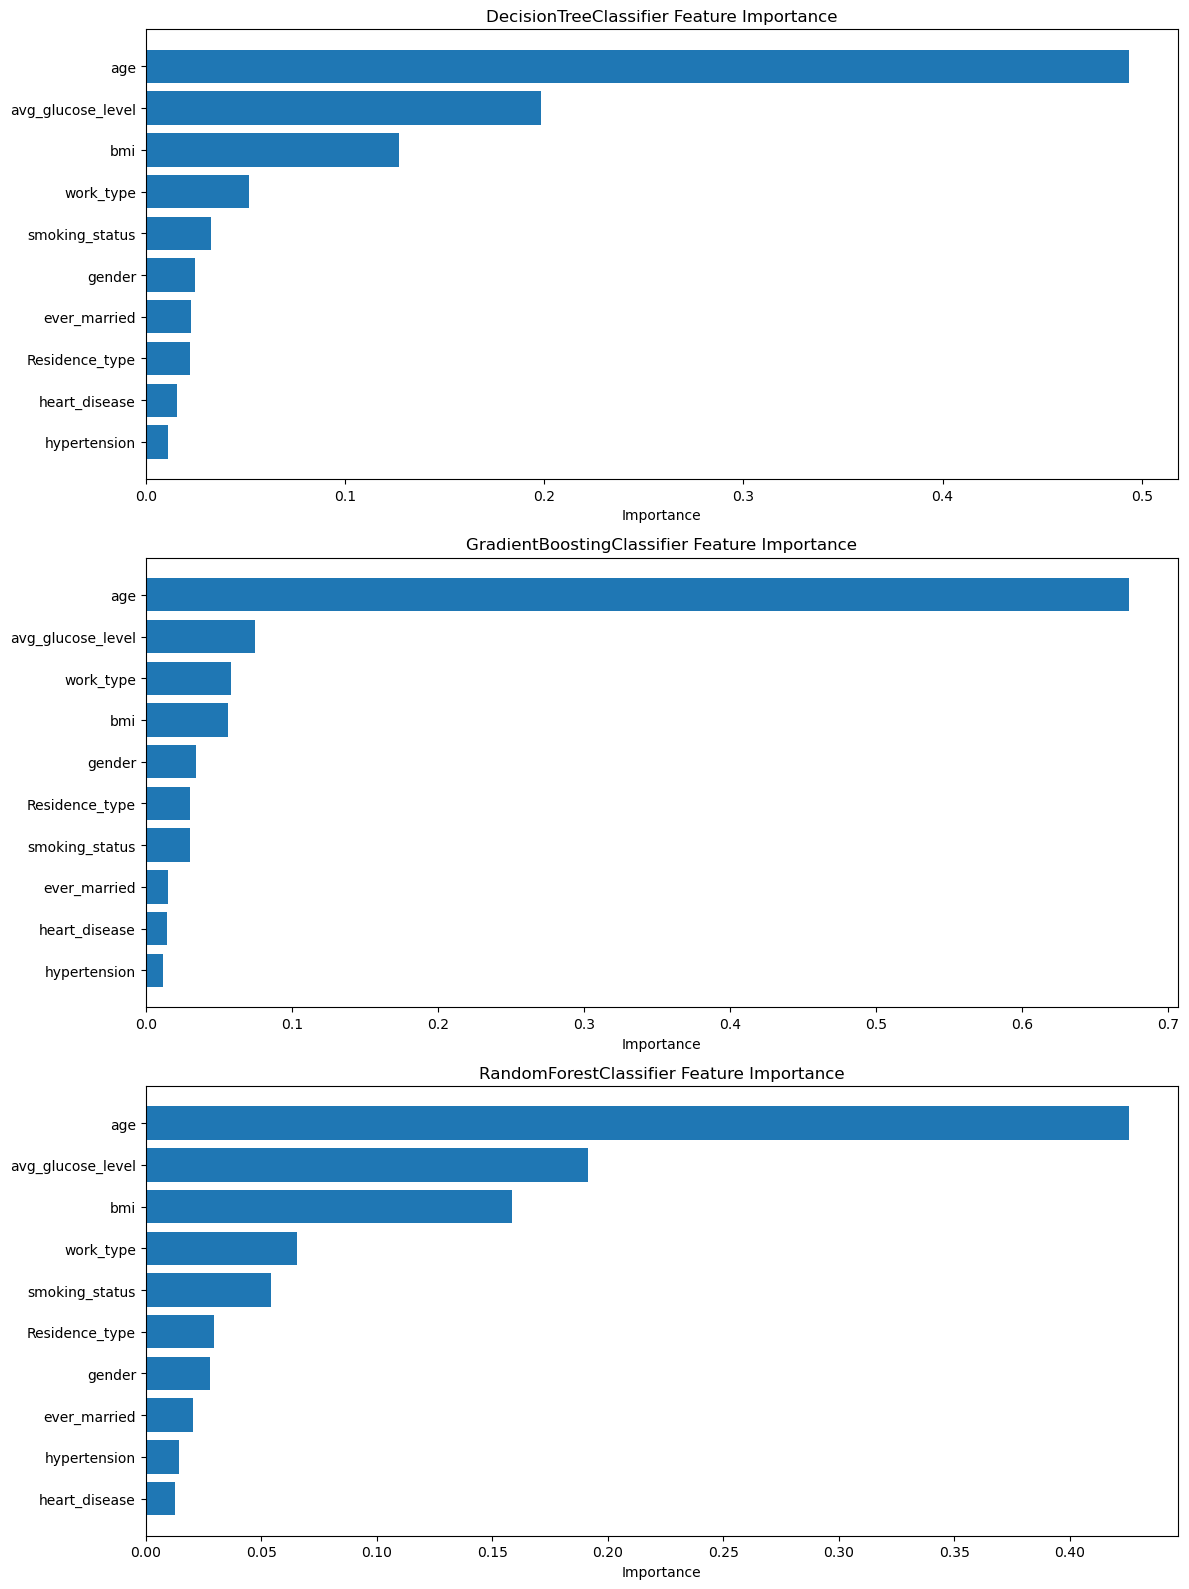

In [21]:
# Plot visualizations for each model
feature_importance_models = [dt,gb,rf]  # Assuming these are your trained models

# Define the number of rows and columns for the subplot grid
num_rows = 3
num_cols = 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 16))

# Flatten the axes array to iterate over subplots
axes = axes.flatten()

for i, model in enumerate(feature_importance_models):
       plot_feature_importance(model, X.columns, ax=axes[i])
       axes[i].set_title(f"{model.__class__.__name__} Feature Importance")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

#### Plot Learning Curve

In [22]:
# Import necessary functions/classes from sklearn
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, auc

# Define a function to plot learning curves
def plot_learning_curve(estimator, title, X_train, y_train_balanced, cv=None, n_jobs=-1, ax=None):
    # Generate learning curves using learning_curve function
    train_sizes, train_scores, test_scores = learning_curve(estimator, X_train, y_train_balanced, cv=cv, n_jobs=n_jobs)
    # Compute mean and standard deviation of training scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    # Compute mean and standard deviation of test scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Create a new figure and axis if not provided
    if ax is None:
        fig, ax = plt.subplots()
    
    # Fill the area between the training score curves
    ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    # Fill the area between the test score curves
    ax.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
    # Plot the training score curve
    ax.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    # Plot the cross-validation score curve
    ax.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
    # Set title of the plot
    ax.set_title(title)
    # Set label for x-axis
    ax.set_xlabel("Training examples")
    # Set label for y-axis
    ax.set_ylabel("Score")
    # Add legend to the plot
    ax.legend(loc="best")


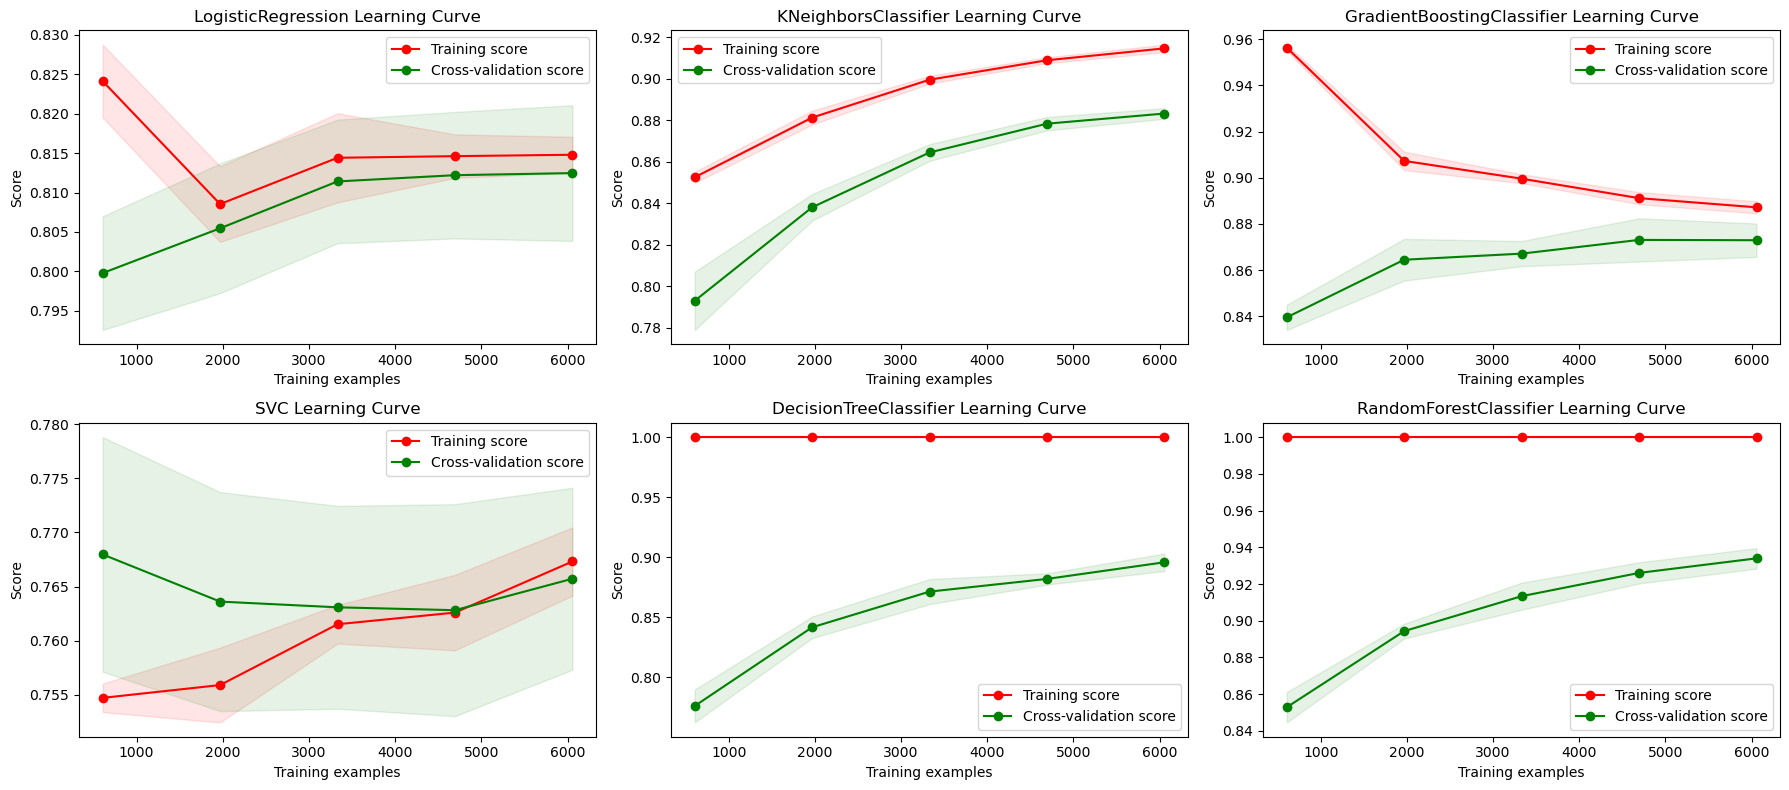

In [23]:
# Define the layout of the grid
num_rows = 2
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 8))

# Flatten the axes array to iterate over subplots
axes = axes.flatten()

for i, model in enumerate(models):
    plot_learning_curve(model, f"{model.__class__.__name__} Learning Curve", X_train, y_train, cv=5, ax=axes[i])

    # Set title for each subplot
    axes[i].set_title(f"{model.__class__.__name__} Learning Curve")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

### Evaluation Metrics
#### Confusion Matrix, accuracy, precision, recall, f1 score

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

# Define a function to compute specificity
def specificity_score(y_true, y_pred):
    # Compute confusion matrix and unpack values
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    # Compute specificity 
    specificity = tn / (tn + fp)
    return specificity

# Define a function to compute evaluation metrics for all models
def evaluate_all_models(models, X_test, y_test):
    # Define lists to store evaluation metrics for test sets
    models_confusion_matrix = []
    models_metrics = []

    # Loop through each model
    for model in models:
        # Compute evaluation metrics for the model
        model_metrics = compute_evaluation_metrics(model, X_test, y_test)
        
        # Append insights to the respective lists
        models_metrics.append(model_metrics)

    # Create DataFrame for test sets
    models_metrics_df = pd.DataFrame(models_metrics)

    # Select columns for the Confusion matrix DataFrame
    cm_columns_to_select = ["Model", "Confusion Matrix", "TP", "FP", "TN", "FN"]

    # Select columns for the metrics DataFrame
    metrics_columns_to_select = ["Model", "Accuracy", "Precision", "Recall/sensitivity", "Specificity", "F1-score"]

    return models_metrics_df[cm_columns_to_select], models_metrics_df[metrics_columns_to_select]

# Define a function to compute evaluation metrics for a single model
def compute_evaluation_metrics(model, X_test, y_test):
    # Predict on test set
    y_pred = model.predict(X_test)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Extract TP, FP, TN, FN from confusion matrix
    tn, fp, fn, tp = cm.ravel()  # Extract values from confusion matrix
    
    # Compute evaluation metrics for test set
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    specificity = specificity_score(y_test, y_pred)  # Calculate specificity
    f_score = f1_score(y_test, y_pred)
    
    # Store confusion matrix and metrics df
    metrics = {
        "Model": model.__class__.__name__,
        "Confusion Matrix": cm,
        "TP": tp, "FP": fp, "TN": tn, "FN": fn,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall/sensitivity": recall,
        "Specificity": specificity,
        "F1-score": f_score,
       
    }
    
    return metrics



Plot Confusion Meatrix


In [25]:
from sklearn.metrics import confusion_matrix

# Define a function to plot confusion matrix for all the models
def plot_confusion_matrix(models_names, models_cm):
    
    # Plot confusion matrices for each model in a grid
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Create a 2x3 grid of subplots
    for i, title in enumerate(models_names):  # Iterate over models
        row = i // 3  # Calculate row index
        col = i % 3  # Calculate column index
        ax = axes[row, col]
        # Plot confusion matrix
        sns.heatmap(models_cm[i], annot=True, fmt='d', cmap='YlGnBu', cbar=False, ax=ax)  # Plot heatmap with annotations
        ax.set_xlabel('Predicted labels')  # Set x-axis label
        ax.set_ylabel('Actual labels')  # Set y-axis label
        ax.set_title(title)  # Set title

    plt.tight_layout()  # Adjust subplot layout to make plots fit into the figure area
    plt.show()  # Show the plots

## Evaluate the models

In [26]:
# compute evaluation metrics for all models
models_cm_df, models_metrics_df = evaluate_all_models(models, X_test, y_test)

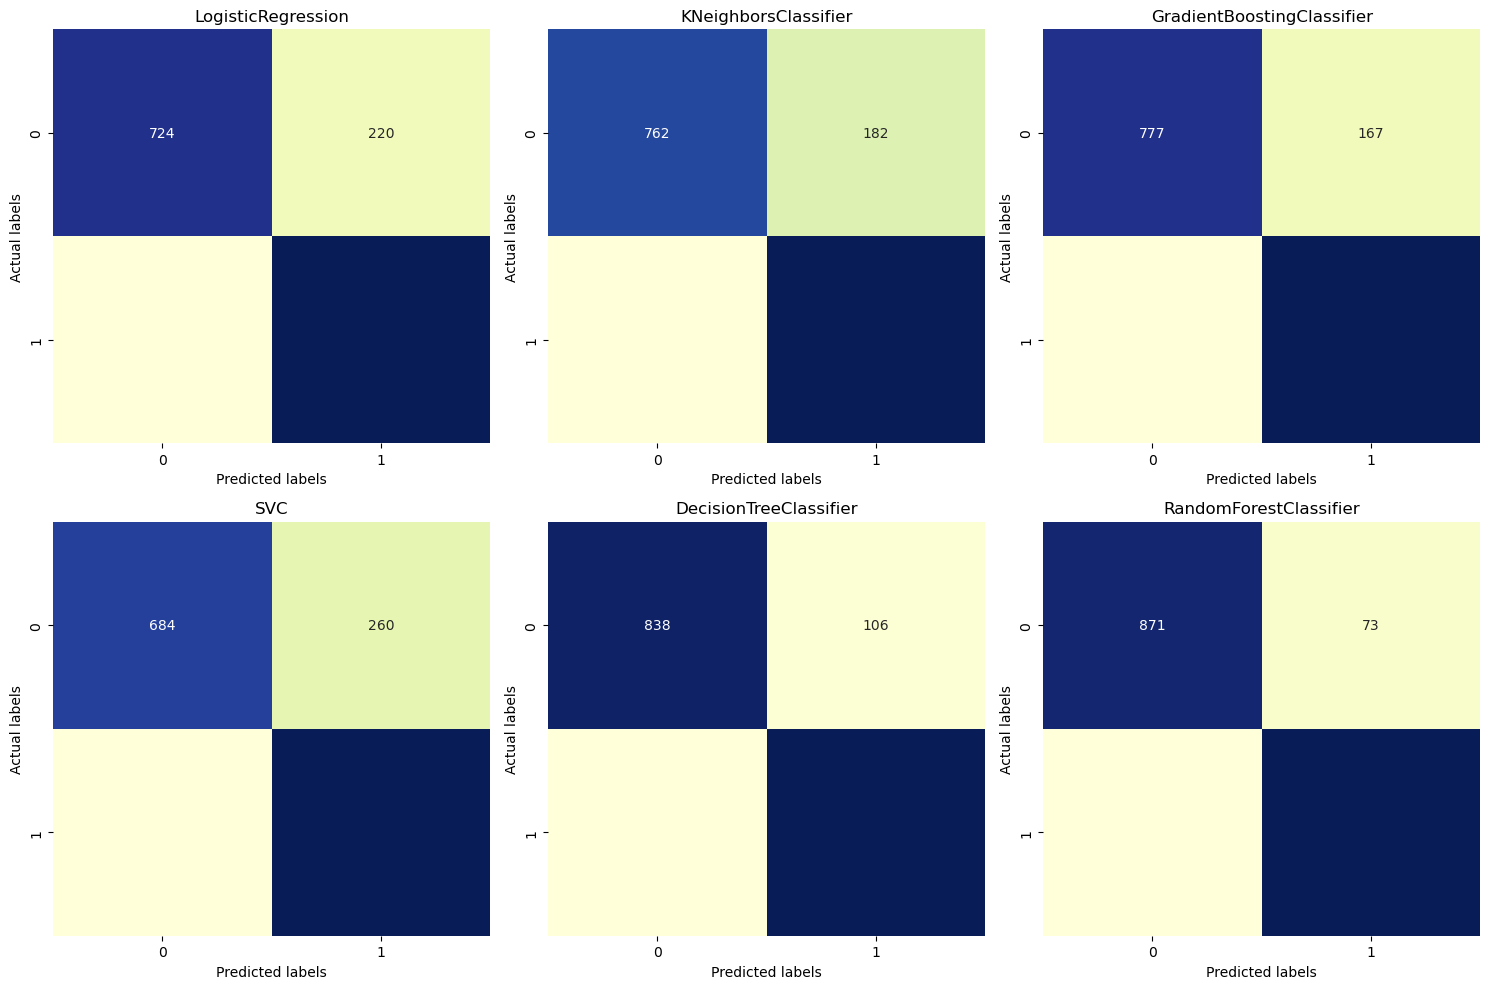

In [27]:
#Plot Confusion Matrix
plot_confusion_matrix(models_cm_df["Model"], models_cm_df["Confusion Matrix"])

In [28]:
# Display the confusion matrix
print("\nConfusion Matrix :")
display(models_cm_df[["Model", "TP", "FP", "TN", "FN"]])


Confusion Matrix :


,Model,TP,FP,TN,FN
0,LogisticRegression,793,220,724,157
1,KNeighborsClassifier,929,182,762,21
2,GradientBoostingClassifier,860,167,777,90
3,SVC,784,260,684,166
4,DecisionTreeClassifier,862,106,838,88
5,RandomForestClassifier,912,73,871,38


In each cell, "TP" represents True Positives, "FP" represents False Positives, and "FN" represents False Negatives. "TN" represents True Negatives. These values are filled in for both the neutral or dissatisfied and satisfied classes for each model.

In [29]:
# Display the performance metrics DataFrame
print("\nTest Set Evaluation Metrics :")
display(models_metrics_df)


Test Set Evaluation Metrics :


,Model,Accuracy,Precision,Recall/sensitivity,Specificity,F1-score
0,LogisticRegression,0.800950,0.782823,0.834737,0.766949,0.807947
1,KNeighborsClassifier,0.892819,0.836184,0.977895,0.807203,0.901504
2,GradientBoostingClassifier,0.864308,0.837390,0.905263,0.823093,0.870005
3,SVC,0.775079,0.750958,0.825263,0.724576,0.786359
4,DecisionTreeClassifier,0.897571,0.890496,0.907368,0.887712,0.898853
5,RandomForestClassifier,0.941394,0.925888,0.960000,0.922669,0.942636


#### Best Parmeters for Models

In [30]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, KFold

models = [lr, knn, gb, dt, rf]


# Define hyperparameter grid for Logistic Regression model
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter values to test
    'penalty': ['l2']  # Penalty term for regularization ('l2' for ridge regularization)
}

# Define hyperparameter grid for K-Nearest Neighbors (KNN) model
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
    'weights': ['uniform', 'distance']  # Weight function used in prediction
}

# Define the hyperparameter grid for Gradient Boosting model
param_grid_gb = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages to be run
    'max_depth': [3, 5, 7],  # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2']  # Maximum number of features to consider when splitting a node
}

# Define hyperparameter grid for Support Vector Machine (SVM) model
# param_grid_svm = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
#     'kernel': ['linear', 'rbf', 'poly'],  # Kernel function used for the decision function
#     'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf' and 'poly' kernels
# }


# Define hyperparameter grid for Decision Tree model
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40],  # Maximum depth of the tree (None means unlimited)
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None]  # Maximum number of features to consider when splitting a node
}


# Define hyperparameter grid for Random Forest model
param_grid_rf = {
    'n_estimators': [100, 200,300],  # Number of trees in the forest
    'max_depth': [10,20,30],  # Maximum depth of the trees in the forest
    'min_samples_split': [2, 5,10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2,4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2']  # Maximum number of features to consider when splitting a node
}
# Define a list of param_grids corresponding to each model
param_grids = [param_grid_lr, param_grid_knn, param_grid_gb, param_grid_dt, param_grid_rf]
# Define scoring functions
scorers = {
    'accuracy_score': make_scorer(accuracy_score),
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score)
}

# Iterate over each model and its corresponding param_grid
for i in range(len(models)):
    model = models[i]  # Get the current model
    param_grid = param_grids[i]  # Get the corresponding hyperparameter grid
    
    # Define K-fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
  # Perform GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring=scorers,refit='recall_score', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
     # Retrieve best parameters and best scores
    best_params = grid_search.best_params_
    best_scores = grid_search.cv_results_

    # Update model with best parameters and fit the model
    model.set_params(**best_params)
    model.fit(X_train, y_train)
    
# Print best parameters and best scores
    print("model after use best parameters: ",model)
    print(f"Best Parameters for {model.__class__.__name__}: {best_params}")
    print(f"Best Scores for {model.__class__.__name__}:")
    for scorer in scorers:
        print(f"{scorer}: {best_scores['mean_test_' + scorer][grid_search.best_index_]}")
    print()

c:\Users\rubaa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\rubaa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

model after use best parameters:  LogisticRegression(C=0.01)
Best Parameters for LogisticRegression: {'C': 0.01, 'penalty': 'l2'}
Best Scores for LogisticRegression:
accuracy_score: 0.80533537369589
precision_score: 0.7864615266177586
recall_score: 0.8380634013390373

model after use best parameters:  KNeighborsClassifier(weights='distance')
Best Parameters for KNeighborsClassifier: {'n_neighbors': 5, 'weights': 'distance'}
Best Scores for KNeighborsClassifier:
accuracy_score: 0.888271926267924
precision_score: 0.8267235499559529
recall_score: 0.9822919382694895

model after use best parameters:  GradientBoostingClassifier(max_depth=7, max_features='sqrt', min_samples_leaf=4,
                           min_samples_split=10, n_estimators=300,
                           random_state=42)
Best Parameters for GradientBoostingClassifier: {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best Scores for GradientBoostingClassifier:
ac

###  Evaluate The models after Parameters tuning

In [45]:
models = [lr, knn, gb, svm, dt, rf]
# compute evaluation metrics for all models
models_cm_df, models_metrics_df = evaluate_all_models(models, X_test, y_test)

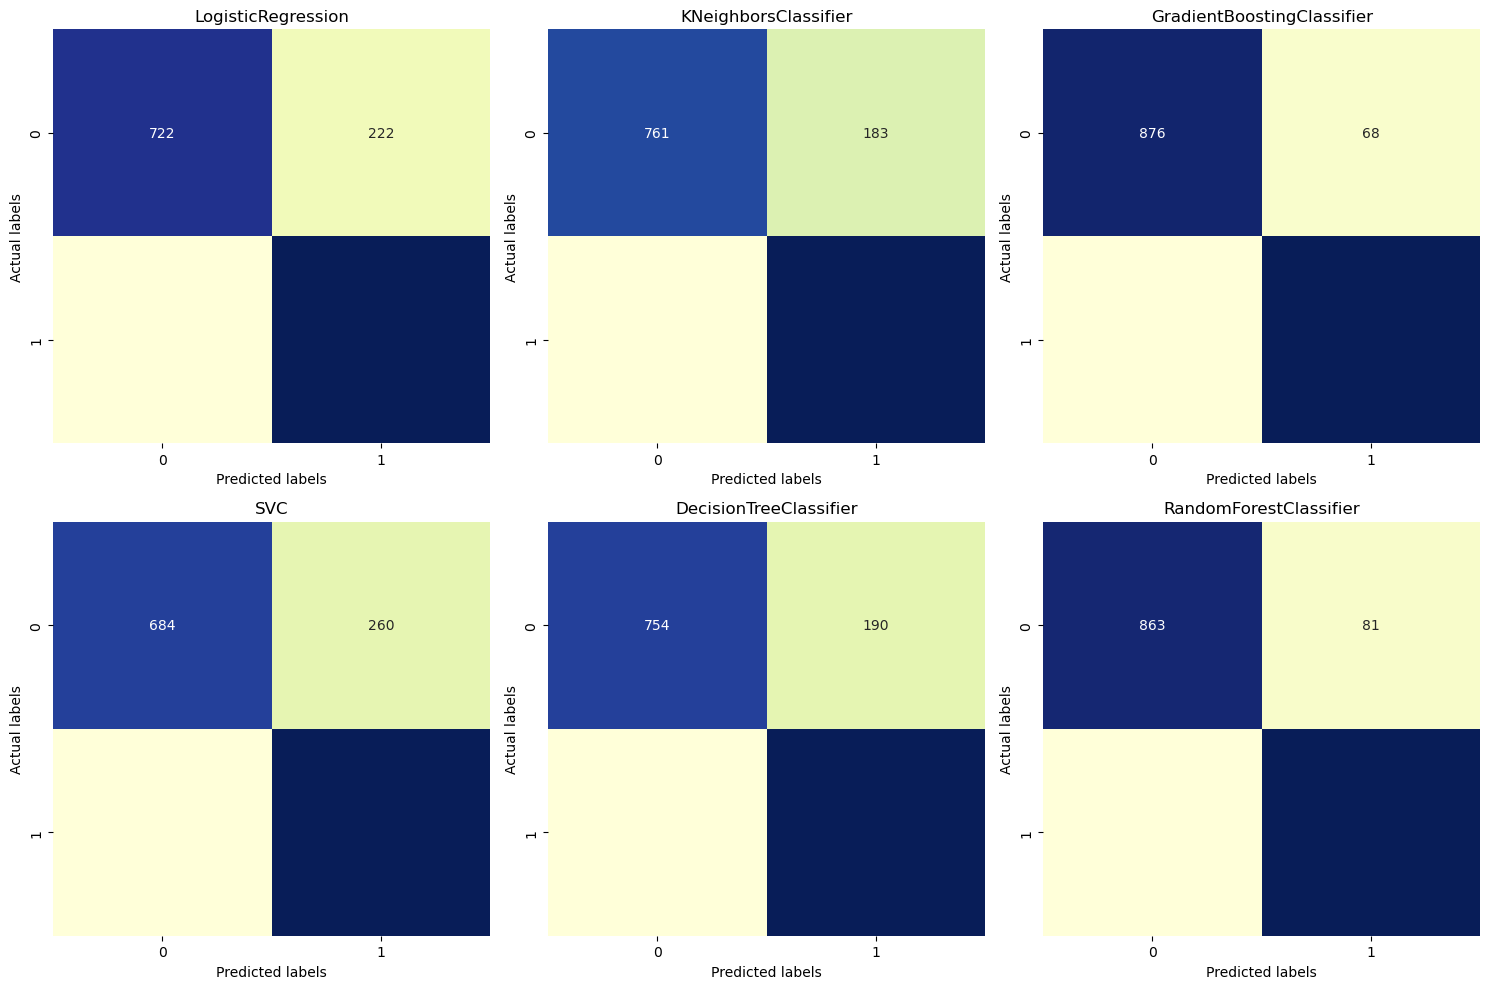

In [46]:
plot_confusion_matrix(models_cm_df["Model"], models_cm_df["Confusion Matrix"])

In [47]:
# Display the confusion matrix
print("\nConfusion Matrix after tuning:")
# display DataFrame
display(models_cm_df[["Model", "TP", "FP", "TN", "FN"]])


Confusion Matrix after tuning:


,Model,TP,FP,TN,FN
0,LogisticRegression,792,222,722,158
1,KNeighborsClassifier,935,183,761,15
2,GradientBoostingClassifier,917,68,876,33
3,SVC,784,260,684,166
4,DecisionTreeClassifier,887,190,754,63
5,RandomForestClassifier,913,81,863,37


In [48]:
# Display the performance metrics DataFrame
print("\nTest Set Evaluation Metrics after tuning:")
display(models_metrics_df)


Test Set Evaluation Metrics after tuning:


,Model,Accuracy,Precision,Recall/sensitivity,Specificity,F1-score
0,LogisticRegression,0.799366,0.781065,0.833684,0.764831,0.806517
1,KNeighborsClassifier,0.895459,0.836315,0.984211,0.806144,0.904255
2,GradientBoostingClassifier,0.946674,0.930964,0.965263,0.927966,0.947804
3,SVC,0.775079,0.750958,0.825263,0.724576,0.786359
4,DecisionTreeClassifier,0.866420,0.823584,0.933684,0.798729,0.875185
5,RandomForestClassifier,0.937698,0.918511,0.961053,0.914195,0.939300


In [49]:
# compute evaluation metrics for all models
models_cm_df, models_metrics_df = evaluate_all_models(models, X_test, y_test)

# Calculate the overall score for each model using a specified equation
for model in models:
    # Retrieve the evaluation metrics for the test set
    metrics = models_metrics_df[models_metrics_df['Model'] == model.__class__.__name__].iloc[0]
    # Calculate the overall score for the model
    score = (metrics['Accuracy']  +  metrics['F1-score']+ metrics['Specificity']) / 3
    # Add the score to the DataFrame
    models_metrics_df.loc[models_metrics_df['Model'] == model.__class__.__name__, 'Score'] = score
print("\nBest Model:")
display(models_metrics_df)
# Find the model with the highest score
best_score = models_metrics_df['Score'].max()
best_model = models_metrics_df[models_metrics_df['Score'] == best_score]
print("\nBest Model:")
display(best_model)


Best Model:


,Model,Accuracy,Precision,Recall/sensitivity,Specificity,F1-score,Score
0,LogisticRegression,0.799366,0.781065,0.833684,0.764831,0.806517,0.790238
1,KNeighborsClassifier,0.895459,0.836315,0.984211,0.806144,0.904255,0.868620
2,GradientBoostingClassifier,0.946674,0.930964,0.965263,0.927966,0.947804,0.940814
3,SVC,0.775079,0.750958,0.825263,0.724576,0.786359,0.762005
4,DecisionTreeClassifier,0.866420,0.823584,0.933684,0.798729,0.875185,0.846778
5,RandomForestClassifier,0.937698,0.918511,0.961053,0.914195,0.939300,0.930398



Best Model:


,Model,Accuracy,Precision,Recall/sensitivity,Specificity,F1-score,Score
2,GradientBoostingClassifier,0.946674,0.930964,0.965263,0.927966,0.947804,0.940814


#### Plot precision_recall_curve

In [52]:
from sklearn.metrics import precision_recall_curve
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds, model_name, ax):
    """
    Plot precision and recall scores as a function of the decision threshold.
    
    Parameters:
        precisions (array-like): Precision scores.
        recalls (array-like): Recall scores.
        thresholds (array-like): Decision thresholds.
        model_name (str): Name of the model.
        ax (matplotlib axes): Axes to plot on.
    """
    ax.plot(thresholds, precisions[:-1], "b--", label="Precision")
    ax.plot(thresholds, recalls[:-1], "g-", label="Recall")
    ax.set_ylabel("Score")
    ax.set_xlabel("Decision Threshold")
    ax.set_title(f"Precision and Recall Scores as a Function of Decision Threshold ({model_name})")
    ax.legend(loc='best')



c:\Users\rubaa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


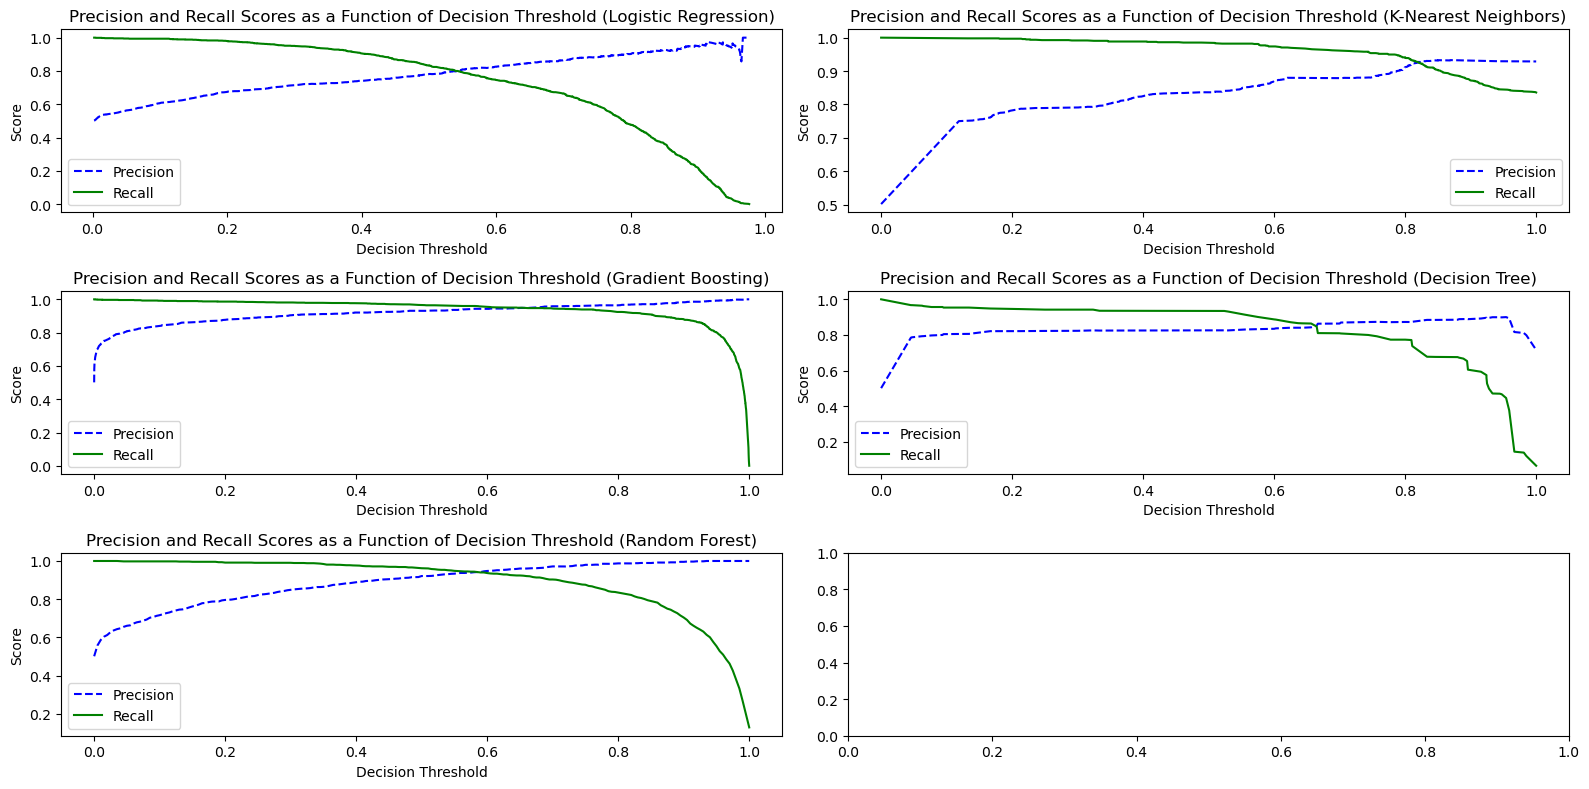

In [53]:
# Define the models
precision_recall_curve_models = [lr, knn, gb, dt, rf]
model_names = ["Logistic Regression", "K-Nearest Neighbors", "Gradient Boosting", "Decision Tree", "Random Forest"]

# Define the number of rows and columns for the grid
num_rows = (len(models) + 1) // 2
num_cols = min(2, len(models))

# Create a figure and axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 8))

# Flatten the axes if necessary
if num_rows == 1:
    axes = [axes]

# Plot precision-recall curves for each model
for i, (model, name) in enumerate(zip(precision_recall_curve_models, model_names)):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row][col]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_scores = model.predict_proba(X_test)[:, 1]
    
    # Compute precision and recall
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
    
    # Plot precision-recall vs threshold
    plot_precision_recall_vs_threshold(precision, recall, thresholds, name, ax)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

ROC Curve

In [54]:
import numpy as np

def roc_threshold(y_test, y_scores, threshold):
    """
    Modify predicted labels based on the ROC curve threshold.

    Parameters:
        y_test (array-like): True labels for the test set.
        y_scores (array-like): Predicted probabilities for the positive class.
        threshold (float): Threshold value for the ROC curve.

    Returns:
        array-like: Modified predicted labels based on the threshold.
    """
    # Convert probabilities to binary predictions based on the threshold
    y_pred = np.where(y_scores >= threshold, 1, 0)
    
    return y_pred

In [55]:
# Define a function to plot ROC curve
def plot_roc_curve(model, X_test, y_test, ax=None):
    # Predict probabilities for positive class
    y_score = model.predict_proba(X_test)[:, 1]
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # Create a new figure and axis if not provided
    if ax is None:
        fig, ax = plt.subplots()

    # Plot ROC curve
    ax.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    # Plot the diagonal dashed line
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    # Set limits for x-axis
    ax.set_xlim([0.0, 1.0])
    # Set limits for y-axis
    ax.set_ylim([0.0, 1.05])
    # Set label for x-axis
    ax.set_xlabel('False Positive Rate')
    # Set label for y-axis
    ax.set_ylabel('True Positive Rate')
    # Set title of the plot
    ax.set_title('Receiver Operating Characteristic (ROC) Curve')
    # Add legend to the plot
    ax.legend(loc="lower right")



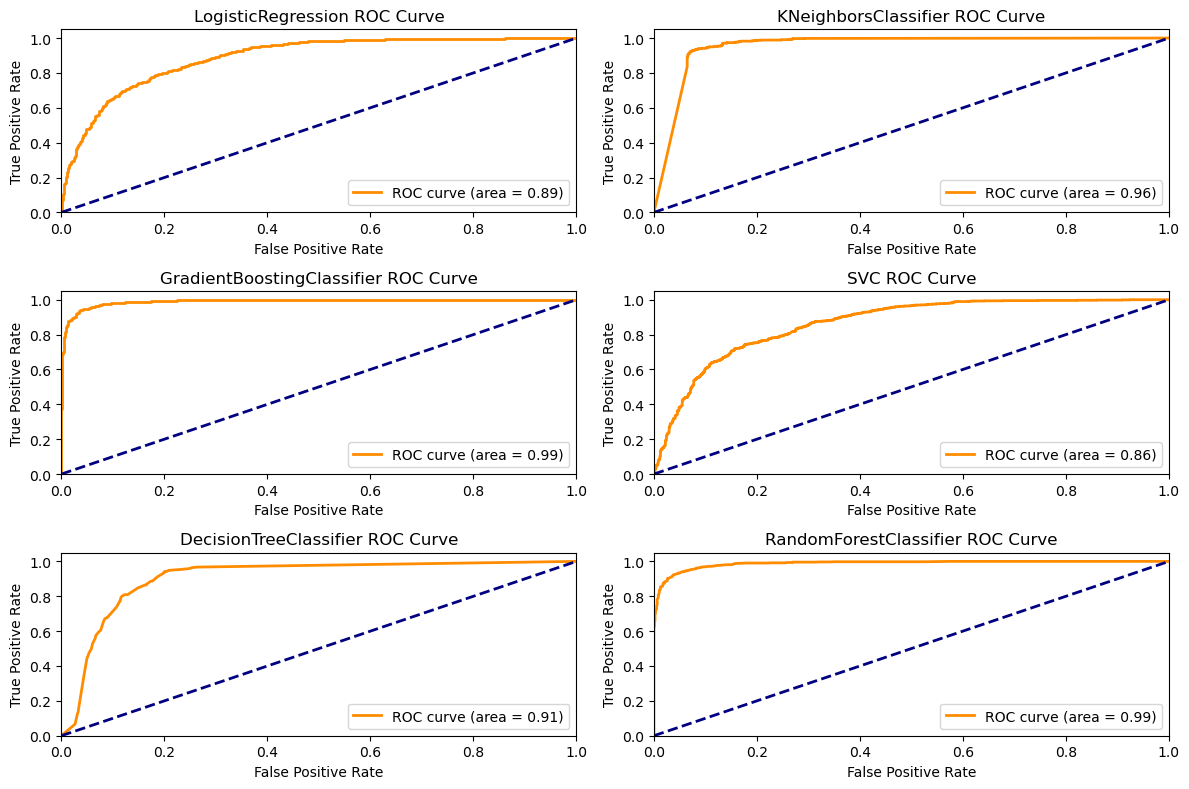

In [56]:
# Define the number of rows and columns for the subplot grid
num_rows = 3
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the axes array to iterate over subplots
axes = axes.flatten()

for i, model in enumerate(models):
       plot_roc_curve(model, X_test, y_test, ax=axes[i])
       axes[i].set_title(f"{model.__class__.__name__} ROC Curve")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

#### Best Model


In [57]:
# import shap
# import matplotlib.pyplot as plt

# # Create an explainer object
# explainer = shap.TreeExplainer(rf)

# # Calculate SHAP values for the test set
# shap_values = explainer.shap_values(X_test)

# # Summary plot for all features
# shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# # Dependence plot for each feature
# for feature in X.columns:
#     shap.dependence_plot(feature, shap_values, X_test, feature_names=X.columns)

# # Force plot for the first instance in the test set
# shap.initjs()
# shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test[0], feature_names=X.columns)

# # Waterfall plot for the first instance in the test set
# shap.waterfall_plot(shap.Explanation(values=shap_values[1][0], base_values=explainer.expected_value[1], data=X_test[0], feature_names=X.columns))

# plt.show()

In [59]:
# Predict the target labels for the test set using the trained XGBoost model
y_pred = gb.predict(X_test)

# Calculate the accuracy score by comparing the predicted labels (y_pred) with the true labels (y_test)
score = accuracy_score(y_test, y_pred) * 100

# Print the accuracy of the model, formatted to display two decimal places
print("Accuracy of the model is %.2f" % score)


Accuracy of the model is 94.67


##### Test best model predictions:

In [60]:
# def make_predictions(model, scaler, input_data):
#     # Check if input_data has the correct format and dimensions
#     if not isinstance(input_data, (tuple, list)):
#         raise ValueError("Input data must be a tuple or a list.")
#     if len(input_data) != X.shape[1]:
#         raise ValueError(f"Input data must contain {X.shape[1]} features.")
    
#     # Convert input data to a numpy array
#     input_data_as_numpy_array = np.asarray(input_data)

#     # Reshape the array as we are predicting one instance
#     input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

#     # Check if the input_data has the correct dimensions after reshaping
#     if input_data_reshaped.shape != (1, X.shape[1]):
#         raise ValueError(f"Input data has incorrect dimensions after reshaping. Expected shape: (1, {X.shape[1]}).")

#     # Standardize the input data
#     std_data = scaler.transform(input_data_reshaped)

#     # Make predictions using the model
#     predictions = model.predict(std_data)
    
#     return predictions

# # Example usage:

# dissatisfied_data = (0,0,13,0,1,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,18.0)
# satisfied_data = (1,0,52,1,2,2035,4,3,4,4,5,5,5,5,5,5,5,4,5,4,0.0)
# try:
#     print("Predictions for neutral or  dissatisfaied customer is:", make_predictions(xgb, scaler, dissatisfied_data))
#     print("Predictions for  satisfaied  customer is:", make_predictions(xgb, scaler, satisfied_data))
# except ValueError as ve:
#     print("Error:", ve)

Save Best Model in File

In [62]:
# Import the pickle module for serializing and deserializing Python objects
import pickle

# Assign the xgb model to the variable selected_model
selected_model = gb

# Serialize and save the selected_model object to a binary file named 'best_model.pkl'
pickle.dump(selected_model, open('../../../../best_model.pkl', 'wb+'))

# Serialize and save the scaler object to a binary file named 'scaler.pkl'
pickle.dump(scaler, open('../../../../scaler.pkl', 'wb+'))
